CRM Project Steps (BY RAMAZAN ÖZDEMIR - user on Kaggle)

Steps
1. Data Preprocessing
Data preprocessing is a critical step in data analysis and machine learning, as it involves transforming raw data into a format that is suitable for analysis or model training. This process can include cleaning the data by removing duplicates, correcting errors, and handling missing values, as well as transforming the data by scaling or normalizing it, feature engineering, and selecting relevant variables. The goal of data preprocessing is to improve the quality of the data and reduce the noise, so that it can be analyzed effectively and used to develop accurate models that provide meaningful insights. Overall, data preprocessing is a crucial step in any data science project, as it can greatly impact the accuracy and effectiveness of the resulting models.

2. Creating the CLTV Data Structure
CLTV (Customer Lifetime Value) is a metric that measures the total value of a customer's long-term relationship with a company. This value is obtained by subtracting the total costs incurred by the company during the customer's use of its products or services from the total revenues generated by the customer for the company. A high CLTV indicates the success of a company's customer-centric approach.

3. BG/NBD, Establishment of Gamma-Gamma Models, Calculation of CLTV
BG/NBD is a probabilistic model that models customer purchase behavior. This model is used to predict the probability of customers making repeat purchases within a certain period. The model is based on customer behavior in terms of purchase frequency and purchase amounts, and uses this data to predict their future purchase behavior.

The Gamma-Gamma model is a statistical model used to estimate the expected monetary value (EMV) of customers for a company. This model is used in conjunction with the Pareto/NBD model and is based on the assumption that the variance of the transaction values is proportional to the mean transaction value. The Gamma-Gamma model estimates the variance of the transaction values and allows for the calculation of the EMV, which is a measure of a customer's lifetime value in terms of the monetary value they bring to the company.

4. Creating Segments by CLTV
1CLTV segments refer to the grouping of customers based on their estimated Customer Lifetime Value (CLTV). These segments are used to identify and target customers with the highest potential value to the company. Common CLTV segments include high-value, medium-value, and low-value customers, with each group having specific characteristics that can inform targeted marketing and retention strategies. By segmenting customers based on their CLTV, companies can allocate their resources more effectively and maximize the return on investment of their marketing efforts.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:

holidays_events = r'C:\Users\Samuel Coromandel\Ebay Store Sales Dashboard\Practice Store Sales Notebook\holidays_events.csv'
stores = r'C:\Users\Samuel Coromandel\Ebay Store Sales Dashboard\Practice Store Sales Notebook\stores.csv'
transactions = r'C:\Users\Samuel Coromandel\Ebay Store Sales Dashboard\Practice Store Sales Notebook\transactions.csv'


df_holidays_events = pd.read_csv(holidays_events)
df_stores = pd.read_csv(stores)
df_transactions = pd.read_csv(transactions)



         date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False  
   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsa

In [7]:
def check_data(dataframe, head=5):
    print(" SHAPE ".center(70,'-'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" TYPES ".center(70,'-'))
    print(dataframe.dtypes)
    print(" HEAD ".center(70,'-'))
    print(dataframe.head(head))
    print(" TAIL ".center(70,'-'))
    print(dataframe.tail(head))
    print(" MISSING VALUES ".center(70,'-'))
    print(dataframe.isnull().sum())
    print(" DUPLICATED VALUES ".center(70,'-'))
    print(dataframe.duplicated().sum())

    

check_data(df_holidays_events)
check_data(df_stores)
check_data(df_transactions)

------------------------------- SHAPE --------------------------------
Rows: 350
Columns: 6
------------------------------- TYPES --------------------------------
date           object
type           object
locale         object
locale_name    object
description    object
transferred      bool
dtype: object
-------------------------------- HEAD --------------------------------
         date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False  
-------------------------------- TAIL -----

In [8]:
df = pd.merge(df_stores, df_transactions, left_on='store_nbr', right_on='store_nbr')
print(df)

       store_nbr       city      state type  cluster        date  transactions
0              1      Quito  Pichincha    D       13  2013-01-02          2111
1              1      Quito  Pichincha    D       13  2013-01-03          1833
2              1      Quito  Pichincha    D       13  2013-01-04          1863
3              1      Quito  Pichincha    D       13  2013-01-05          1509
4              1      Quito  Pichincha    D       13  2013-01-06           520
...          ...        ...        ...  ...      ...         ...           ...
83483         54  El Carmen     Manabi    C        3  2017-08-11           768
83484         54  El Carmen     Manabi    C        3  2017-08-12           903
83485         54  El Carmen     Manabi    C        3  2017-08-13          1054
83486         54  El Carmen     Manabi    C        3  2017-08-14           818
83487         54  El Carmen     Manabi    C        3  2017-08-15           802

[83488 rows x 7 columns]


In [16]:
df.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,397924.000000,397924.000000,397924.000000,397924.000000
mean,11.833736,2.893163,15294.315171,20.627751
std,25.534512,3.227059,1713.169877,51.826400
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13969.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000
max,298.500000,37.060000,18287.000000,3268.575000


In [ ]:
# Drop null values
data.dropna(inplace=True)

# Remove duplicates
data.drop_duplicates(inplace=True)

# Convert columns to appropriate data types
data['date'] = pd.to_datetime(data['date'])
data['amount'] = pd.to_numeric(data['amount'])

# Replace incorrect values
data.loc[data['amount'] < 0, 'amount'] = 0

# Export cleaned data to SQLite
data.to_sql('cleaned_table', conn, if_exists='replace')

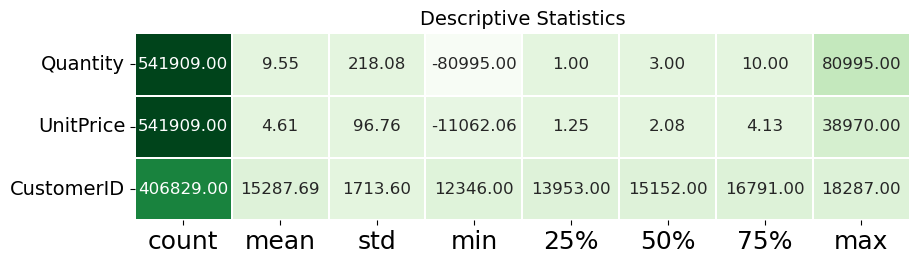

In [10]:
def desc_stats(dataframe):
    desc_df = pd.DataFrame(index= dataframe.columns, 
                           columns= dataframe.describe().T.columns,
                           data= dataframe.describe().T)
    
    f,ax = plt.subplots(figsize=(10,
                                 desc_df.shape[0] * 0.81))
    sns.heatmap(desc_df,
                annot = True,
                cmap = "Greens",
                fmt = '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.1,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 18)
    plt.yticks(size = 14,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()
    
desc_stats(df.select_dtypes(include = [float, int]))

📌 It is clearly seems that there are ouliters in Quantity and UnitPrice that have to be handled
📌 There are negative values in UnitPrice and Quantity because of cancelled orders.
📌 Missing values in Customer ID and Description.
📌 Quantity and Unit Price should be multiplied in order to create Total Price.

### Data Preprocessing

In [11]:
def replace_with_thresholds(dataframe, variable, q1 = 0.25, q3 = 0.75):
    
    '''
    Detects outliers with IQR method and replaces with thresholds 
    
    '''
    
    df_ = dataframe.copy()
    quartile1 = df_[variable].quantile(q1)
    quartile3 = df_[variable].quantile(q3)
    iqr = quartile3 - quartile1
    
    up_limit = quartile3 + 1.5 * iqr
    low_limit = quartile1 - 1.5 * iqr
    df_.loc[(df_[variable] < low_limit), variable] = low_limit
    df_.loc[(df_[variable] > up_limit), variable] = up_limit
    
    return df_

def ecommerce_preprocess(dataframe):
    df_ = dataframe.copy()
    
    #Missing Values
    df_ = df_.dropna()
    
    #Cancelled Orders & Quantity
    df_ = df_[~df_['InvoiceNo'].str.contains('C', na = False)]
    df_ = df_[df_['Quantity'] > 0]
    
    #Replacing Outliers
    df_ = replace_with_thresholds(df_, "Quantity", q1 = 0.01, q3 = 0.99)
    df_ = replace_with_thresholds(df_, "UnitPrice", q1 = 0.01, q3 = 0.99)
    
    #Total Price
    df_["TotalPrice"] = df_["Quantity"] * df_["UnitPrice"]
    
    return df_

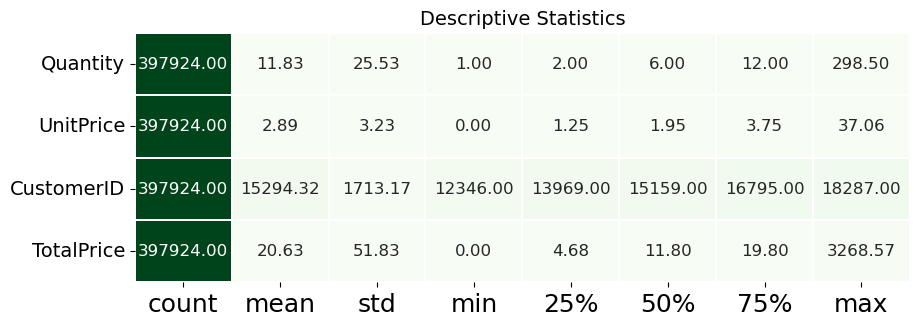

In [15]:
df = ecommerce_preprocess(df)

desc_stats(df.select_dtypes(include = [float, int]))

In [13]:
df.to_csv('Cleaned_CRM_Data')

In [14]:
df.to_excel('Cleaned_CRM_Data.xlsx')

Make prettier dashboards - Look at power bi dashboard examples, tableau dashboard examples
Use postgressql  and microsoft azure, tableau
User power automate more and unlock its potential
create pivot tables and dashboards in excel